<div style="text-align:center">
<img src="img/intro_correspondre.png">
</div>


*** CREATION IN PROGRESS ***<br>
Notebook created by GITHUB ESTELLE DERRIEN

## Summary

27. <b> Modeling of a shortest path problem  </b>
    - Abstract
    - Instance : Basical case
    - NetworkX Djikstra Solution
    - SHortest Path Python Pulp Solution
    - Instance : Find shortest path from Chicago to Dallas
    - Naïve wrong try out example with python pulp
    - Hard coded Python Pulp solution
    - Mathematical model
    - Compact Python Pulp solution
28. <b> Modeling of a production allocation problem  </b>
    - Abstract
    - Instance : Mumbaï university - 3 products company
    - Math model
    - Python Pulp solution (Hard coded)
    - Python Pulp solution (Compact model)
29. <b> Simple machinery load balancing </b>
    - Abstract
    - Instance : Minimize the electricity cost of 4 machines ( Estelle Derrien example)
    - Math model
    - Python Pulp solution (Hard coded)
    - Python Pulp solution (Compact model)
    - Adding workers costs

30. <b> Modeling of an oil refinery problem</b>
    - Abstract
    - Instance : ApMonitor example
    - Math model
    - Python Pulp solution (Hard coded)
    - Python Pulp solution (Compact model)

31. <b> Modeling of a 1d cutting stock problem  </b>
    - Abstract
    - Difference between 1d and 2d
    - Instance : Andrew Crouter - Colorado school of mines
    - Math model - Gau and Wascher (1995).
    - Python Pulp solution (Hard coded)
    - First of all, let's confirm the provided solution works .
    - Python Pulp solution (Stuart Mitchell  Compact model)
    - Automatically computing all of the cutting stock patterns possibilities

32. <b> Modeling of a parallels machines jobs scheduling problem  </b>
    - Abstract
    - Difference between Indentical machines VS uniform machine scheduling
    - Instance
    - Math model
    - Cplex Philippe Labourie code
    - Python Pulp solution (Hard coded)
    - Python Pulp solution (Compact model)
33. <b> Modeling of a 2d bin packing problem  </b>
    - Abstract
    - Instance
    - Math model
34. <b> Modeling of a 3d bin packing problem  </b>
    - Abstract
    - Instance
    - Math model
35. <b> Modeling of a 2d cutting stock problem  </b>
    - Abstract
    - Instance
    - Math model
36. <b> Modeling of a job shop problem  </b>
    - Abstract
    - Difference between flow shop and job shop
    - Instance
    - Math model
    - CPlex Min Kyung Lee code
    - Google OR solution 
    - Pyomo solution
37. <b> Modeling of a chemistry combinatorial optimization  </b>
    - Abstract 
    - Instance : Tim Mac Graw Book problem BOILER/TURBO-GENERATOR SYSTEM
    - Mathematical modeling
    - Python Pulp or Cplex solution
38. <b> Modeling a petroleum combinatorial optimization </b>
    - Abstract and Kirchhoff constraints
    - Mathematical modeling
    - Python Pulp or Cplex solution
39. <b> Modeling of a multiple objectives problem</b>
    - Abstract of https://www.supplychaindataanalytics.com/multi-objective-linear-optimization-with-pulp-in-python/
    - Mathematical modeling
    - Python Pulp or Cplex solution
40. <b> Getting familiar with sensitivity analysis</b>
    - Displaying Reduced costs
    - Displaying The Shadow Price
    - Displaying Slacks variables
41. <b> Getting familiar with variables relaxations</b>
42. <b> Getting familiar with columns generation</b>

43. <b> Linearizations </b>
    - Linearization technics using the AIMMS modeling guide and Ling-Chieh Kung technics
    - Objective linearizations
    - Constraints linearizations
    - Examples using Python solvers


44. <b> Apendix </b> 
- Importing a data instance from an Excel file
- Importing a data instance from a Database

# <b>27.  Modeling a shortest path problem  </b>

<div style="text-align:center">
<img src="img/highway.webp" width="500"/>
</div>

## <b>27.1 Abstract </b>

The shortest path problem is the problem of finding a path between two vertices (or nodes) in a graph such that the sum of the weights of its constituent edges is minimized.

## <b>27.2 Instance : Basical case</b>

<div style="text-align:center">
<img src="img/sp.png" width="500"/>
</div>

<b> What is the shortest path from node A to node F ?</b><br><br>
Link : https://transport-systems.imperial.ac.uk/tf/60008_21/n3_6_shortest_paths_pulp.html

## <b>27.4 NetworkX Djikstra Solution </b>


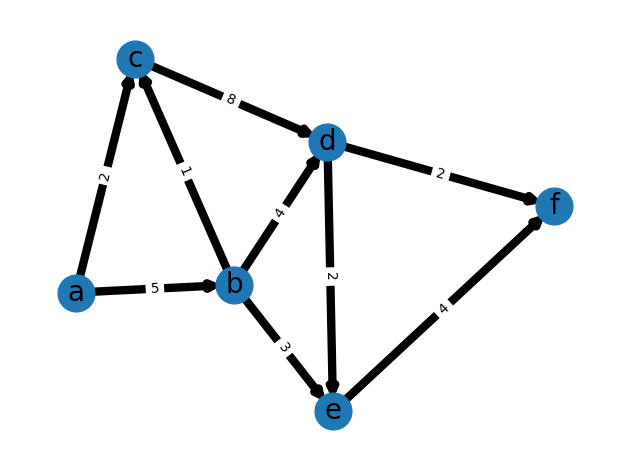

In [217]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()

G.add_edge("a", "b", weight=5,pos=(1,1))
G.add_edge("a", "c", weight=2)
G.add_edge("b", "c", weight=1,pos=(1,2))
G.add_edge("b", "d", weight=4)
G.add_edge("b", "e", weight=3)
G.add_edge("c", "d", weight=8)
G.add_edge("d", "e", weight=2)
G.add_edge("d", "f", weight=2)
G.add_edge("e", "f", weight=4)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=2)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [218]:
print("Path to follow")
nx.dijkstra_path(G, "a", "f")

Path to follow


['a', 'b', 'd', 'f']

In [219]:
print("Minimal Distance")
nx.dijkstra_path_length(G, "a", "f")

Minimal Distance


11

## <b>27.5 Python Pulp compact solution </b>

Testing the https://transport-systems.imperial.ac.uk/tf/60008_21/n3_6_shortest_paths_pulp.html LP code, this LP Pulp code provides the same solution than Djikstra :

<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [220]:
# -----------------------------------
# Import lib
# -----------------------------------
from pulp import *

# -----------------------------------
# Instance
# -----------------------------------

N = ['A', 'B', 'C', 'D', 'E', 'F']

C = {'A': {'B': 5, 'C': 2}, 
     'B': {'C': 1, 'D': 4, 'E': 3}, 
     'C': {'D': 8}, 
     'D': {'E': 2, 'F': 2}, 
     'E': {'F': 4}}

# -----------------------------------
# All of the links from i to j possibilities
# -----------------------------------
# Meaning : node value is 1 if it's the first node, and -1 if F (last node)
D = {node: 1 if node == 'A' else -1 if node == 'F' else 0 for node in N}

# As soon as an xij variable is involved in the math model, 
# this coding strategy is used to model all of the possibilities.
# then, all of the possibilities becomes decisions variables, under the "decisions variables " part
E = [(i,j) for i in N for j in N if i in C.keys() if j in C[i].keys()]

# -----------------------------------
# Type of problem
# -----------------------------------
prob = LpProblem('prob', LpMinimize)

# -----------------------------------
# Decisions variables
# -----------------------------------
x = LpVariable.dicts('x', E,  lowBound = 0, upBound = 1, cat = LpInteger)

# -----------------------------------
# Math model 
# -----------------------------------

# objective
prob += lpSum([C[i][j]*x[i,j] for (i,j) in E])

# constraints
for i in N:
    prob += (lpSum([x[i,j] for j in N if (i,j) in E]) - lpSum([x[k,i] for k in N if (k,i) in E])) == D[i]

# -----------------------------------
# Solution
# -----------------------------------

status = prob.solve()

print(f'STATUS\n{LpStatus[status]}\n')

print('SOLUTION')
for v in prob.variables():
    if v.varValue >= 1:
        print(v.name, '=', v.varValue)

print("Minimized path = ", value(prob.objective))

STATUS
Optimal

SOLUTION
x_('A',_'B') = 1.0
x_('B',_'D') = 1.0
x_('D',_'F') = 1.0
Minimized path =  11.0


## <b> 27.6 Instance : Find shortest path from Chicago to Dallas</b>

Let's observe and recreate this hard coded version in Pulp , for a better understanding :

Link:
https://www.youtube.com/watch?v=7uCx--vUiiI

<div style="text-align:center">
<img src="img/sp2.png" >
</div>
Find the shortest path between Chicago and node 6 (Dallas), values are fictive.


<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

Let's start with a naïve wrong try , picking all of the shortest nodes routes

In [221]:
# -----------------------------------
# Import lib
# -----------------------------------
from pulp import *


# -----------------------------------
# Type of problem
# -----------------------------------
prob = LpProblem('prob', LpMinimize)

# -----------------------------------
# Decisions variables
# -----------------------------------
# Recreating all xij roads possibilities, it's supra boring by hand.
# simply look at the graph to recreate the decisions variables.

# Node 1
X12 = pulp.LpVariable('X12', lowBound=0, cat='Binary')
X13 = pulp.LpVariable('X13', lowBound=0, cat='Binary')
X14 = pulp.LpVariable('X14', lowBound=0, cat='Binary')

# Node 2
X23 = pulp.LpVariable('X23', lowBound=0, cat='Binary')
X25 = pulp.LpVariable('X25', lowBound=0, cat='Binary')

# Node 3
X32 = pulp.LpVariable('X32', lowBound=0, cat='Binary')
X34 = pulp.LpVariable('X34', lowBound=0, cat='Binary')
X35 = pulp.LpVariable('X35', lowBound=0, cat='Binary')
X36 = pulp.LpVariable('X36', lowBound=0, cat='Binary')

# Node 4
X43 = pulp.LpVariable('X43', lowBound=0, cat='Binary')
X47 = pulp.LpVariable('X47', lowBound=0, cat='Binary')

# Node 5
X52 = pulp.LpVariable('X52', lowBound=0, cat='Binary')
X53 = pulp.LpVariable('X53', lowBound=0, cat='Binary')
X56 = pulp.LpVariable('X56', lowBound=0, cat='Binary')
X57 = pulp.LpVariable('X57', lowBound=0, cat='Binary')

# Node 7
X74 = pulp.LpVariable('X74', lowBound=0, cat='Binary')
X75 = pulp.LpVariable('X75', lowBound=0, cat='Binary')
X76 = pulp.LpVariable('X76', lowBound=0, cat='Binary')

# -----------------------------------
# Math model 
# -----------------------------------

# Objective
# Find the shortest path = minimizing roads distances
prob += 35 * X12 + 30 * X13 + 20 * X14 + 20 * X23 + 12 * X25 + 8 * X32 + 9 * X34 + 10 * X35 + 20 * X36  + 9 * X43 + 15 * X47 + 12 * X52 + 10 * X53 + 5 * X56 + 20 * X57 + 15 * X74 + 20 * X75 + 5 * X76

# Constraints
# Only one road picked per node
prob += X12 + X13 + X14 == 1
prob += X23 + X25  == 1
prob += X32 + X34 + X35 + X36  == 1
prob += X43 + X47   == 1
prob += X52 + X53 + X56 + X57   == 1
prob += X74 + X75 + X76  == 1

# -----------------------------------
# Solution
# -----------------------------------

status = prob.solve()

print(f'STATUS\n{LpStatus[status]}\n')

print('SOLUTION')
for v in prob.variables():
    if v.varValue >= 1:
        print(v.name, '=', v.varValue)



STATUS
Optimal

SOLUTION
X14 = 1.0
X25 = 1.0
X32 = 1.0
X43 = 1.0
X56 = 1.0
X76 = 1.0


Ok, in this front code, some logic is missing, we obtain each of the shortest node paths but it make no sense for finding the shortest path .
Let see how the constraints coding differs in this next coding part, path solution is correct  :

In [222]:
# -----------------------------------
# Import lib
# -----------------------------------
from pulp import *


# -----------------------------------
# Type of problem
# -----------------------------------
prob = LpProblem('prob', LpMinimize)

# -----------------------------------
# Decisions variables
# -----------------------------------
# Recreating all xij roads possibilities, it's supra boring by hand.
# simply look at the graph to recreate the decisions variables.

# Node 1
X12 = pulp.LpVariable('X12', lowBound=0, cat='Binary')
X13 = pulp.LpVariable('X13', lowBound=0, cat='Binary')
X14 = pulp.LpVariable('X14', lowBound=0, cat='Binary')

# Node 2
X23 = pulp.LpVariable('X23', lowBound=0, cat='Binary')
X25 = pulp.LpVariable('X25', lowBound=0, cat='Binary')

# Node 3
X32 = pulp.LpVariable('X32', lowBound=0, cat='Binary')
X34 = pulp.LpVariable('X34', lowBound=0, cat='Binary')
X35 = pulp.LpVariable('X35', lowBound=0, cat='Binary')
X36 = pulp.LpVariable('X36', lowBound=0, cat='Binary')

# Node 4
X43 = pulp.LpVariable('X43', lowBound=0, cat='Binary')
X47 = pulp.LpVariable('X47', lowBound=0, cat='Binary')

# Node 5
X52 = pulp.LpVariable('X52', lowBound=0, cat='Binary')
X53 = pulp.LpVariable('X53', lowBound=0, cat='Binary')
X56 = pulp.LpVariable('X56', lowBound=0, cat='Binary')
X57 = pulp.LpVariable('X57', lowBound=0, cat='Binary')

# Node 7
X74 = pulp.LpVariable('X74', lowBound=0, cat='Binary')
X75 = pulp.LpVariable('X75', lowBound=0, cat='Binary')
X76 = pulp.LpVariable('X76', lowBound=0, cat='Binary')

# -----------------------------------
# Math model 
# -----------------------------------

# Objective
# Find the shortest path = minimizing roads distances
prob += 35 * X12 + 30 * X13 + 20 * X14 + 20 * X23 + 12 * X25 + 8 * X32 + 9 * X34 + 10 * X35 + 20 * X36  + 9 * X43 + 15 * X47 + 12 * X52 + 10 * X53 + 5 * X56 + 20 * X57 + 15 * X74 + 20 * X75 + 5 * X76

# Constraints
# Only one road picked per node
prob += X12 + X13 + X14 == 1 # Node 1 Chicago 

prob += X23 + X25  == X12 + X32 + X52
prob += X32 + X34 + X35 + X36  == X13 + X23 + X43 + X53
prob += X43 + X47   == X14 + X34 + X74 
prob += X52 + X53 + X56 + X57  == X25 + X35 + X75 
prob += X74 + X75 + X76  == X47 + X57

# -----------------------------------
# Solution
# -----------------------------------

status = prob.solve()

print(f'STATUS\n{LpStatus[status]}\n')

print('SOLUTION')

for v in prob.variables():
    if v.varValue >= 1:
        print(v.name, '=', v.varValue)
print("Minimized path = ", value(prob.objective))

STATUS
Optimal

SOLUTION
X14 = 1.0
X47 = 1.0
X76 = 1.0
Minimized path =  40.0


We see that the python pulp path [{1-4},{4-7},{7-6}] and the path value is <b>40</b> ,it's the same than the online business analytics youtube channel,looking good, bro.


<div style="text-align:center">
<img src="img/thumbs-up.jpg" width="100">
</div>

Here is a screen cap :
<div style="text-align:center">
<img src="img/spath2.png" width="500"/>
</div>

But I did not answer about " How theses strange constraints do works " ?
To answer that, we need to <b>link</b> the Shortest path LP <b>Math model</b> to the python pulp code, so, variables need to be stricly the same.

After that, we'll be able to RECODE this python pulp code as a <b>COMPACT MODEL</b>, just like in chapter 27.5, and make them perfectly match together.

## <b>Shortest Path LP Math model</b>

Let's first observe some maths models found on the internet : 

Bernard Lidicky Version :
https://lidicky.name/oldteaching/18.566/l13%20-%20Shortest%20Path%20and%20Linear%20Programming.pdf

<div style="text-align:center">
<img src="img/spmathmodel.png" width="500"/>
</div>

courses.ie.bilkent.edu.tr version :
https://courses.ie.bilkent.edu.tr/ie400/wp-content/uploads/sites/8/2017/09/Lecture8.pdf

<div style="text-align:center">
<img src="img/spmathmodel2.png" width="500"/>
</div>

The bilkent.edu model clearly looks like the code I've found in my chapter 27.5.
Let's match them variables names exactly, now, and keep the values found at chapter 27.6, will the solution be the same ? :

Instance reminder : Find the shortest path between node 1 (Chicago) and node 6 (Dallas).
<div style="text-align:center">
<img src="img/sp2.png" >
</div>

<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

Now, I'm rewriting the Python pulp code just like the bilkent math model:

In [223]:
# -----------------------------------
# Import lib
# -----------------------------------
from pulp import *

# -----------------------------------
# Instance
# -----------------------------------

# Node list
A = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6','X7']

# Roads costs or length
C = {'X1': {'X2': 35, 'X3': 30 , 'X4': 20 }, 
     'X2': {'X3': 12, 'X5': 8},
     'X3': {'X2': 8,'X4': 9,'X5': 10,'X6': 20,}, 
     'X4': {'X3': 9, 'X7': 15 }, 
     'X5': {'X2': 12, 'X3': 10, 'X6': 5, 'X7': 20},
     'X6': {'X3': 20, 'X5': 5,'X7': 5},
     'X7': {'X5': 20, 'X6': 5}     
     }

# -----------------------------------
# Decision variables settings
# -----------------------------------
# Define starting and ending nodes like in the math model:
# Meaning : node value is 1 if it's the first node, and -1 if  last node
D = {node: 1 if node == 'X1' else -1 if node == 'X6' else 0 for node in A}

# -----------------------------------
# All of the links from i to j possibilities
# -----------------------------------
# As soon as an xij variable is involved in the math model, 
# this coding strategy is used to model all of the possibilities.
# then, all of the possibilities becomes decisions variables, under the "decisions variables " part
E = [(i,j) for i in A for j in A if i in C.keys() if j in C[i].keys()]
# The previous line recreates all of the decisions variables possibilities
# It was so boring to type by hand in the previous example : x_('X1',_'X4')

# -----------------------------------
# Type of problem
# -----------------------------------
prob = LpProblem('prob', LpMinimize)

# -----------------------------------
# Decisions variables creation
# -----------------------------------
x = LpVariable.dicts('x', E,  lowBound = 0, upBound = 1, cat = LpInteger)

# -----------------------------------
# Math model 
# -----------------------------------

# objective
prob += lpSum([C[i][j]*x[i,j] for (i,j) in E]) # Looks like the math model

# constraints
for i in A:
    prob += (lpSum([x[i,j] for j in A if (i,j) in E]) - lpSum([x[j,i] for j in A if (j,i) in E])) == D[i] # Looks like the math model

# -----------------------------------
# Solution
# -----------------------------------

status = prob.solve()

print(f'STATUS\n{LpStatus[status]}\n')

print('SOLUTION')
for v in prob.variables():
    if v.varValue >= 1:
        print(v.name, '=', v.varValue)

print("Minimized path = ", value(prob.objective))

STATUS
Optimal

SOLUTION
x_('X1',_'X4') = 1.0
x_('X4',_'X7') = 1.0
x_('X7',_'X6') = 1.0
Minimized path =  40.0


We see that the python pulp path [{1-4},{4-7},{7-6}] and the path value is <b>40</b>, that's the same than the online business analytics youtube channel, done with Lindo, looking good, bro, and now, we can make the link between the math model, and the python pulp code with ease, cool , bro.


<div style="text-align:center">
<img src="img/thumbs-up.jpg" width="100">
</div>

# <b> 28.  Modeling of a production allocation problem  </b>

<div style="text-align:center">
<img src="img/free-photo-of-industrial-factory-floor-with-machinery.jpeg" width="500"/>
</div>
    
## <b>28.1 Abstract</b>

We distribute our products to be built on machines which produce an identical product
under different time constraints per machine. They can be labelled as "parallels machines".

## <b>28.2 Instance : Mumbaï university - 3 products company</b>
<div style="text-align:center">
<img src="img/productionallocation.jpg"  />
</div>

## <b>28.3 Math model</b>
To formulate the math model, I look closely at the exposed problem, deducing the objective fonction, and constraints,
and including the mandatory nomenclature.

$$
Max (P) = \sum_{j=1}^{3} p_{j}.x_{j} 
$$
$$
subject \thinspace to
$$
$$
   \sum_{j=1}^{3} t_{ij}.x_{j}  <= a_{i}  \thinspace ∀ \thinspace i \in (1,...,3)
$$
$$
x_{j} \in ℕ 
$$

$$
where
$$

$$
 P = main \thinspace profit
$$
$$
 x_{j} = product \thinspace 
$$
$$
 p_{j} = product \thinspace profit
$$
$$
 t_{ij} = time \thinspace per \thinspace product \thinspace   j \thinspace per \thinspace machine \thinspace i
$$
$$
 a_{i} = available \thinspace time \thinspace per \thinspace machine \thinspace i
$$
$$
 X = Products \thinspace set
$$
$$
 m = Machines \thinspace set
$$



## <b>28.4 Python Pulp hard coded solution</b>

<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [224]:
# -----------------------------------
# Import lib
# -----------------------------------
import pulp as p 
  
# -----------------------------------
# Type of problem
# -----------------------------------
Lp_prob = p.LpProblem('Problem', p.LpMaximize)  
  
# -----------------------------------
# decision variables creation
# -----------------------------------
# Products aren't separables, so they are integer variables.
x = p.LpVariable("x", lowBound = 0, cat='Integer')   
y = p.LpVariable("y", lowBound = 0, cat='Integer')   
z = p.LpVariable("z", lowBound = 0, cat='Integer')   

# -----------------------------------
# Math model
# -----------------------------------
# Objective
Lp_prob +=  4 * x + 3 * y + 6 * z
  
# Constraints
# Machine 1
Lp_prob += 2 * x + 3 * y + 2 * z <= 440
# Machine 2
Lp_prob += 4 * x + 0 * y + 3 * z <= 470
# Machine 3
Lp_prob += 2 * x + 5 * y + 0 * z <= 430

# Facultative : Minimal amount of produced goods
# Lp_prob += x  >= 100
# Lp_prob += y  >= 10
# Lp_prob += z  >= 10
  
# -----------------------------------
# Solution
# -----------------------------------

status = Lp_prob.solve()

# Lp status
print(p.LpStatus[status])   
  
# Display solution
print( p.value(x)," amount of product 1 to build ")
print(p.value(y) , "amount of product 2 to build "  )
print(p.value(z) , "amount of product 3 to build "  )
print(p.value(Lp_prob.objective) ,"Profit in euros " )


Optimal
0.0  amount of product 1 to build 
42.0 amount of product 2 to build 
156.0 amount of product 3 to build 
1062.0 Profit in euros 


I do notice that this math model does not dispatch products per machines, well, it's normal, It's another case, and another math model, I think I have it somewhere...

# <b> 28.5 Python Pulp solution (Compact model)</b>

Now, I am using the math model to express the compact Python Pulp code, variables names are the same than in the math model , I am now avoiding arrays, and using nested 'objects' to recreate the math model , hu:

<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [225]:
# -----------------------------------
# Import lib
# -----------------------------------
import pulp

# -----------------------------------
# Instance
# -----------------------------------
# Products variables
X = ['P1', 'P2', 'P3']

m = ['M1','M2','M3']

# Products profits
p = {'P1': 4, 'P2': 3, 'P3': 6}

# Products time making per machines
t = {'M1': {'P1': 2, 'P2': 3 , 'P3': 2 }, 
     'M2':{'P1': 4, 'P2': 0 , 'P3': 3 }, 
     'M3':{'P1': 2, 'P2': 5 , 'P3': 0 }
}

# Available time per machine
a = {'M1': 440,
     'M2':470,
     'M3':430
}

# -----------------------------------
# Type of problem
# -----------------------------------
Lp_prob = LpProblem('Problem', LpMaximize)  
  
# -----------------------------------
# decision variables creation
# -----------------------------------
# Products aren't separables, so they are integer variables.
x = LpVariable . dicts ( "product" , X , lowBound = 0 , cat = 'Integer' ) 

# -----------------------------------
# Math model
# -----------------------------------
# Objective
Lp_prob += lpSum ([ p [ j ] * x [ j ] for j in X ]), "MAXIMIZE_PROFIT_FUNCTION_P" # Looks like the math model
# Note : don't be scared, the previous line simply recreates equivalent to 4 * x + 3 * y + 6 * z as in the previous example
  
# Constraints
for i in m: 
    Lp_prob += lpSum ([ t [ i ][ j ] * x [ j ] for j in X ]) <= a[i]  # Looks like the math model, ain't that cool, bro ?

# Note : don't be scared, the previous line simply recreates constraints equivalent to the previous hard coded example
# # Machine 1
# Lp_prob += 2 * x + 3 * y + 2 * z <= 440
# # Machine 2
# Lp_prob += 4 * x + 0 * y + 3 * z <= 470
# # Machine 3
# Lp_prob += 2 * x + 5 * y + 0 * z <= 430

  
# -----------------------------------
# Solution
# -----------------------------------
Lp_prob.solve ()

print('Status:', LpStatus[Lp_prob.status])

for v in Lp_prob . variables ():
    print( v . name , "=" , v . varValue )

print ( "Maximized total profit = " , value ( Lp_prob.objective ) )


Status: Optimal
product_P1 = 0.0
product_P2 = 42.0
product_P3 = 156.0
Maximized total profit =  1062.0


# <b> 30. Simple machinery load balancing </b>

<div style="text-align:center">
<img src="img/Fotothek_df_ps_0000315_Montagehalle_einer_Maschinenfabrik.jpg" width="500"/>
</div>


## <b> Abstract </b>

I have an inventory of items to be processed by parallel machines which have different production costs.
How can I distribute my objects in order to minimize my production costs?

## <b> Instance </b>
I have 200 items in inventory to process, and 4 machines from differents size with a respective electricity cost of 2 dollars , 4 dollars, 5 dollars and 2 dollars.
My machines production capacities are 50,100,100,50 units a day.
How can I minimize my electricity cost ?

 <table style="margin: 0px auto;">
  <tr>
    <th><b>Machine</b></th>
    <th>Machine1</th>
    <th>Machine2</th>
    <th>Machine3</th>
    <th>Machine4</th>
  </tr>
  <tr>
    <td>Capacity (Units)</td>
    <td>50</td>
    <td>100 </td>
    <td>100 </td>
    <td>50</td>
  </tr>
  <tr>
    <td>Electricity cost/day (Dollars)</td>
    <td>2</td>
    <td>4 </td>
    <td>5 </td>
    <td>2</td>
  </tr>
 
   
</table> 

## <b> Math model </b>
$$
Min (C) = \sum_{j=1}^{4} cost_{j}.x_{j} 
$$
$$
subject \thinspace to
$$
$$
   \sum_{j=1}^{4} x_{j}  = inventory  
$$
$$
    x_{j}  <= capacity_{j}  
$$
$$
x_{j} \in ℕ 
$$

$$
where
$$

$$
 C = main \thinspace cost
$$
$$
 x_{j} = number \thinspace  of \thinspace  items \thinspace  to \thinspace  assign \thinspace to \thinspace  the \thinspace  j \thinspace  machine 
$$
$$
 cost_{j} = cost \thinspace per \thinspace  j \thinspace  machine
$$
$$
 capacity_{j} = capacity \thinspace per \thinspace  j \thinspace  machine
$$
$$
 inventory = inventory \thinspace to \thinspace process
$$

$$
 X = machines \thinspace set
$$


## <b> Python pulp solution (hard coded ) </b>

<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [226]:
from pulp import *
 
# -----------------------------------
# Decisions variables
# -----------------------------------
machine1 = LpVariable('machine1', lowBound=0, cat='Integer') 
machine2 = LpVariable('machine2', lowBound=0, cat='Integer')
machine3 = LpVariable('machine3', lowBound=0, cat='Integer')
machine4 = LpVariable('machine4', lowBound=0, cat='Integer')

 
# -----------------------------------
# Type of problem
# -----------------------------------
Problem = LpProblem('load_balancing_optimisation',LpMinimize) # I wish to minimize the electricity consumption !
 
# -----------------------------------
# Math model
# -----------------------------------
# Objective : Minimize cost of electricity 
Problem += 2*machine1 + 4*machine2 + 5*machine3 + 2*machine4 
 
# Constraints

# Inventory to process
Problem += machine1 + machine2 + machine3 + machine4   == 200

# Machines capacity
Problem += machine1   <= 50
Problem += machine2   <= 100
Problem += machine3   <= 100
Problem += machine4   <= 50

# -----------------------------------
# Solution
# -----------------------------------
Problem.solve()

print('Statut:', LpStatus[Problem.status])
print('Minimized electricity production cost = ', value(Problem.objective),'dollars')
 
for i in Problem.variables():
    if i.varValue > 0:
        print('Picked machinery:',i.name, '=', i.varValue, "units")

Statut: Optimal
Minimized electricity production cost =  600.0 dollars
Picked machinery: machine1 = 50.0 units
Picked machinery: machine2 = 100.0 units
Picked machinery: machine4 = 50.0 units


## <b> Python pulp solution (Compact model) </b>

Here is a code striclty corresponding to my math model . (Franckly speaking , I think I should add an Aij type of indice somewhere, maybe, but it already work as this.)

<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [227]:
from pulp import *
 
# -----------------------------------
# Instance
# -----------------------------------
# Machines set
X = ['M1','M2','M3','M4']

# Electricity cost per machine
costs = {   'M1':2,
            'M2':4,
            'M3':5,
            'M4':2
        }

# Capacity per machine
capacities = {  'M1':50,
                'M2':100,
                'M3':100,
                'M4':50
            }

# Inventory of items to process
inventory = 200

# -----------------------------------
# Type of problem
# -----------------------------------
Problem = LpProblem('load_balancing_optimization',LpMinimize) # I wish to minimize the electricity consumption !
 
# -----------------------------------
# Decision variables creation
# -----------------------------------
# Items per machines aren't separables, so they are integer variables.
x = LpVariable . dicts ( "machinery" , X , lowBound = 0 , cat = 'Integer' ) 

# -----------------------------------
# Math model
# -----------------------------------
# Objective : Minimize cost of electricity 
Problem += lpSum ([ costs [ j ] * x [ j ] for j in X ]), "MINIMIZE_COST_FUNCTION_C" # Looks like the math model
 
# Constraints

# Inventory to process
Problem += lpSum ([ x [ j ] for j in X ]) == 200 # Looks like the math model

# Machines capacity
for j in capacities:
    Problem +=  x [ j ]  <= capacities[j] # Looks like the math model


# -----------------------------------
# Solution
# -----------------------------------
Problem.solve()

print('Statut:', LpStatus[Problem.status])
print('Minimized electricity production cost = ', value(Problem.objective),'dollars')
 
for i in Problem.variables():
    if i.varValue > 0:
        print('Picked machinery:',i.name, '=', i.varValue, "units")

Statut: Optimal
Minimized electricity production cost =  600.0 dollars
Picked machinery: machinery_M1 = 50.0 units
Picked machinery: machinery_M2 = 100.0 units
Picked machinery: machinery_M4 = 50.0 units



## Adding the workers costs

Saying now that the machines requires a different type of workers, with various costs, will the result be the same ?
The biggers machines are simplier to handle, to the worker cost is cheaper. At contrario, the older smaller machines requiers 
highly specialized kind of workers, really high payed.

## Updated instance
 <table style="margin: 0px auto;">
  <tr>
    <th><b>Machine</b></th>
    <th>Machine1</th>
    <th>Machine2</th>
    <th>Machine3</th>
    <th>Machine4</th>
  </tr>
  <tr>
    <td>Capacity</td>
    <td>50</td>
    <td>100 </td>
    <td>100 </td>
    <td>50</td>
  </tr>
  <tr>
    <td>Electricity cost/day (Dollars)</td>
    <td>2</td>
    <td>4 </td>
    <td>5 </td>
    <td>2</td>
  </tr>
    <tr>
    <td>Worker cost/day (Dollars)</td>
    <td>300</td>
    <td>100 </td>
    <td>100 </td>
    <td>300</td>
  </tr>
 
   
</table> 

## Updated solution

<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [228]:
from pulp import *
 
# -----------------------------------
# Instance
# -----------------------------------
# Machines set
X = ['M1','M2','M3','M4']

# Electricity cost per machine
costs = {   'M1':2,
            'M2':4,
            'M3':5,
            'M4':2
        }

# Capacity per machine
capacities = {  'M1':50,
                'M2':100,
                'M3':100,
                'M4':50
            }

worker_cost = {  'M1':300,
                'M2':100,
                'M3':100,
                'M4':300
            }

# Inventory of items to process
inventory = 200

# -----------------------------------
# Type of problem
# -----------------------------------
Problem = LpProblem('load_balancing_optimization',LpMinimize) # I wish to minimize the main cost !
 
# -----------------------------------
# Decision variables creation
# -----------------------------------
# Items per machines aren't separables, so they are integer variables.
x = LpVariable . dicts ( "machinery" , X , lowBound = 0 , cat = 'Integer' ) 

# -----------------------------------
# Math model
# -----------------------------------
# Objective : Minimize cost of electricity and the workers cost AT THE SAME TIME
Problem += lpSum ([ costs [ j ] * x [ j ] for j in X ] + [ worker_cost [ j ] * x [ j ] for j in X ]), "MINIMIZE_COST_FUNCTION_C" # Looks like the math model
 
# Constraints

# Inventory to process
Problem += lpSum ([ x [ j ] for j in X ]) == 200 # Looks like the math model

# Machines capacity
for j in capacities:
    Problem +=  x [ j ]  <= capacities[j] # Looks like the math model


# -----------------------------------
# Solution
# -----------------------------------
Problem.solve()

print('Statut:', LpStatus[Problem.status])
print('Minimized whole production cost = ', value(Problem.objective),'dollars')
 
for i in Problem.variables():
    if i.varValue > 0:
        print('Picked machinery:',i.name, '=', i.varValue, "units")

Statut: Optimal
Minimized whole production cost =  20900.0 dollars
Picked machinery: machinery_M2 = 100.0 units
Picked machinery: machinery_M3 = 100.0 units


We see that now, Pulp is picking the 2 biggers machines, solution is absolutly not the same than the initial problem, but it's good, and logical.

 # <b> 29.  Modeling of an oil refinery problem</b>


<div style="text-align:center">
<img src="img/oil-refinery-purpose-crude-oil-products.jpg" width="500">
</div>

 ## Abstract

I am the manager of a refinery, I need to define which barrels to produce, to maximize my profit, under some constraints.
 
## Instance : ApMonitor example

Source : https://www.youtube.com/watch?v=Ht1atCXPp24
AP Monitor : Oil Refinery Optimization

- I have two suppliers who sell crude oil for 24 dollars and 15 dollars respectively.
- My refinery resells gasoline for 36 dollars, kerosene for 24 dollars, fuel for 21 dollars and residue for 10 dollars.

How can I maximize my profit(income), subject to max allowable production ?


The transformation characteristics are expressed in the following table:
<div style="text-align:center">
<img src="img/raffinerie.png">
</div>
We see that CRUDE oil 1 makes it possible to produce much more gasoline, for example.
On the other hand, CRUDE oil 2 allows more fuel to be produced, this is expressed in percentages.
We also see the maximum production expressed in BBL in the right column and the production cost per BBL, an SI UNIT of the United States which means Barrel of crude: "The abbreviation BBL stands for a barrel of crude oil."

This is my company commercial plan :
 <table style="margin: 0px auto;">
  <tr>
    <th><b>Product</b></th>
    <th>Gazoline</th>
    <th>Kerosene</th>
    <th>Fuel Oil</th>
    <th>Residual</th>

  </tr>
  <tr>
    <td>Income in dollars</td>
    <td>36</td>
    <td>24</td>
    <td>21</td>
    <td>10</td>
 
  </tr>
 
 
   
</table> 

And the costs :
 <table style="margin: 0px auto;">
  <tr>
    <th><b>Crude Oil</b></th>
    <th>1</th>
    <th>2</th>


  </tr>
  <tr>
    <td>Processing cost ($/BBL)</td>
    <td>0.50</td>
    <td>1</td>

 
  </tr>
   <tr>
    <td>Raw material ($/BBL)</td>
    <td>24</td>
    <td>15</td>
  </tr>
 
 
   
</table> 



## Math model (Hard coded): 
<div style="text-align:center">
<img src="img/raffinerie2.png">
</div>

And if we want to simplify the objective function, we subtract the production and purchasing costs in advance in the objective function: 

<div style="text-align:center">
<img src="img/raffinerie3.png">
</div>






## Math model (Compact model) 

I will elaborate the compact math model, looking closely at the instance, then testing it using python pulp.



$$
Max (P) =  ( income_{k} * (\sum_{j=1}^{2} percentage_{ij}.x_{j})  \thinspace  ∀ \thinspace k \in (1,...,4))
-   \sum_{j=1}^{2} processingCost_{j}.x_{j} - \sum_{j=1}^{2} rawCost_{j}.x_{j} 
$$ 
$$
subject \thinspace to
$$

$$
   \sum_{i=1}^{2} \frac{percentage_{ij}}{100} .x_{i} <= maxProd_{j} \thinspace  ∀ \thinspace j \in (1,...,3)
$$

$$
x_{j} \in ℕ 
$$

$$
where
$$

$$
 P = main \thinspace profit
$$
$$
 x_{j} = Number \thinspace of \thinspace BBl \thinspace per \thinspace day \thinspace to \thinspace produce
$$

$$
 income_{k} = Income \thinspace per \thinspace type \thinspace of \thinspace product \thinspace k
$$
$$
percentage_{ij} = percentage \thinspace of \thinspace product \thinspace j \thinspace per \thinspace crude \thinspace i
$$

$$
processingCost_{j} = processing \thinspace cost \thinspace of \thinspace bbl \thinspace j
$$
$$
rawCost_{j} = raw \thinspace cost \thinspace cost \thinspace of \thinspace bbl \thinspace j
$$
$$
maxProd_{i} = max \thinspace production \thinspace of \thinspace product \thinspace i \thinspace (per \thinspace line \thinspace i)
$$

## Python Pulp solution (Hard coded)

With Python Pulp, we see that we obtain the same result as in the AP Monitor video, which however uses another solver...

<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [229]:
# -----------------------------------
# Import lib
# -----------------------------------
from pulp import *

# -----------------------------------
# Type of problem
# -----------------------------------
prob = LpProblem('oil_refinery_problem', LpMaximize)  

# -----------------------------------
# Decision variables
# -----------------------------------
X1 = LpVariable("Crud1", 0, None, LpInteger)   
X2= LpVariable("Crud2", 0, None, LpInteger)   


# -----------------------------------
# Math model
# -----------------------------------
# Objective
prob +=  8.1 * X1 + 10.2 * X2

# Constraints: 

# Max prod expressed in number of barils

# Gazoil
prob += 0.80 * X1 + 0.44 * X2  <= 24000
# Kerosene
prob += 0.05 * X1 + 0.10 * X2  <= 2000
# Fuel
prob += 0.10 * X1 + 0.36 * X2  <= 6000

# -----------------------------------
# Solution
# -----------------------------------
prob.solve()

for v in prob.variables():
    print(v.name, "=", v.varValue)

print("Maximized profit = ", value(prob.objective),"dollars")

Crud1 = 26206.0
Crud2 = 6897.0
Maximized profit =  282618.0 dollars


## Python Pulp solution (Compact model)

<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

Let's redo the previous hard coded code, but accordingly to the math model I've done.<br>
Solution must be exactly the same, It's just rewritten with more flexibility, 
but at the end, if you print the pulp model, that is EXACTLY THE SAME THING than the hard coded one.
<br>
This is an important point to understand.<br>

<br>
- <b>percentage ij</b> is a matrix in the math model, let's see how to handle that in the pulp code, using nested objects.</br><br>
- <b>computedIncome</b> is used to simplify the code, because there are several pre-computations in the APMonitor example, my math model describes more of the computation</br>

In [230]:
# -----------------------------------
# Import lib
# -----------------------------------
from pulp import *

# -----------------------------------
# Type of problem
# -----------------------------------
prob = LpProblem('oil_refinery_problem', LpMaximize)  

# -----------------------------------
# Instance
# -----------------------------------

## BBLs characteristics
X = ['X1','X2']  # BBL/DAY
processingCost  = {'X1':0.50,'X2':1}
rawCost         = {'X1':24,'X2':15}
percentage      = { 'X1': {'GAZOLINE': 80, 'KEROSENE':5 , 'FUEL':10}, 
                    'X2': {'GAZOLINE': 44, 'KEROSENE': 10, 'FUEL':36}
                }
computedIncome   =  {'X1':32.6,'X2':26.8}

## Products characteristics
product         = ['GAZOLINE','KEROSENE','FUEL']  ## Products to do
income          = {'GAZOLINE':36,'KEROSENE':24,'FUEL':21}
maxProd         = {'GAZOLINE':24000,'KEROSENE':2000,'FUEL':6000}

# -----------------------------------
# Type of problem
# -----------------------------------
prob = LpProblem('oil_refinery_problem', LpMaximize)  

# -----------------------------------
# Decision variables
# -----------------------------------
x = LpVariable.dicts('x', X,  lowBound = 0, cat = LpInteger)

# -----------------------------------
# Math model
# -----------------------------------

# Objective
prob += lpSum ([ computedIncome [ j ] * x [ j ] for j in X ]) - lpSum ([ processingCost [ j ] * x [ j ] for j in X ]) - lpSum ([ rawCost [ j ] * x [ j ] for j in X ]), "MAXIMIZE_FUNCTION_P" 

# Constraints 
for j in product: # Strictly like the math model
    prob += lpSum ([ (percentage [ i ][ j ] / 100) * x [ i ] for i in X ]) <= maxProd[j] # Strictly like the math model

# -----------------------------------
# Solution
# -----------------------------------
prob.solve()

for v in prob.variables():
    print(v.name, "=", v.varValue)

print("Maximized profit = ", value(prob.objective),"dollars")


x_X1 = 26206.0
x_X2 = 6897.0
Maximized profit =  286756.20000000007 dollars


I see that my compact python pulp code now provides the same solution thant the Ap Monitor video, good looking, bro !
I am now not only dealing with some hard code, boring to handle,  but with a generic model, that will evolve through the hard times, and why not adding some non linear stuffs, later , that's what we'll soon see, in my other documentations.

<div style="text-align:center">
<img src="img/thumbs-up.jpg" width="100">
</div>

# <b> 31.  Modeling of a 1d cutting stock problem  </b>

<div style="text-align:center">
<img src="img/precise-scissors-cutting-icon-crafting-260nw-2492458287.webp" width="500"/>
</div>

## Abstract

The cutting stock problem consists of cutting elements (Wood, Metal, etc.) in the most judicious way, in order to reduce losses.
This problem being complicated, we are obliged to define cutting patterns beforehand, the solver will then decide
which cutting patterns to select, in order to save as much stock as possible.

Best links : 
- https://repository.mines.edu/server/api/core/bitstreams/8072a052-f286-4690-868f-426c3b295568/content
- https://towardsdatascience.com/linear-programming-the-stock-cutting-problem-dc6ba3bf3de1/

## Instance

Let's take this Andrew Crouter example, from Colorado school of mines, just to verify that we get the same solution like him, I do not recopy the whole 
thing.

<b>Customer Order :</b>

 <table style="margin: 0px auto;">
  <tr>
    <td>Number of needed pieces</td>
    <td>Length of each pieces</td>
  </tr>
  <tr>
    <td>10</td>
    <td>4</td>

  </tr>
  <tr>
    <td>12</td>
 <td>5</td>
  </tr>
   <tr>
    <td>6</td>
     <td>10</td>

  </tr>
</table> 

<b>Stock length : </b>

 <table style="margin: 0px auto;">
  <tr>
    <td>Stock length</td>

  </tr>
  <tr>
    <td>15</td>
  </tr>

</table> 

<b>Some patterns possibilities:</b>


<div style="text-align:center">
<img src="img/patterns.png" width="500">
</div>


<b>All of the patterns possibilities:</b>

Please look at the Andrew L Crouter document to find it. There are several technics to calculate all of the patterns possibilities, then, you inject it
inside of the linear program. This one has been done by hand, by Andrew L Crouter.
<div style="text-align:center">
<img src="img/Screenshot 2025-10-25 at 12-29-01 Crouter_10794203.pdf.png" width="500"/>
</div>

## <b>Math model</b>

Here is the integer formulation Gau and Wascher (1995). Let's make it match to the Python Pulp code later : 

$$
Min (T) = \sum_{i=1}^{n} x_{j} 
$$
$$
subject \thinspace to
$$
$$
   \sum_{i=1}^{n} a_{ij}.x_{j}   = d_{i}
$$
$$
x_{j} \in ℕ 
$$

$$
where
$$

$$
 T = Total \thinspace number \thinspace of \thinspace stock \thinspace lengths \thinspace used \thinspace = \thinspace minimize \thinspace patterns \thinspace use
$$
$$
 x_{j} =  Number \thinspace of \thinspace times \thinspace to \thinspace perform \thinspace cutting \thinspace pattern \thinspace j
$$
$$
 d_{i} =  Demand \thinspace of \thinspace i \thinspace length
$$
$$
n = total \thinspace number \thinspace of \thinspace cutting \thinspace patterns \thinspace that \thinspace can \thinspace be \thinspace cut \thinspace from \thinspace L
$$
$$
a_{ij} = pattern \thinspace setting \thinspace ( \thinspace That's \thinspace a \thinspace matrix \thinspace)
$$
$$
L = unit \thinspace stock \thinspace length
$$


## <b>Python Pulp solution ( hard coded )</b>

<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

Let's first use logic, to type the hard coded version of the cutting stock prob :

In [231]:
# -----------------------------------
# Import lib
# -----------------------------------
import pulp

# -----------------------------------
# Type of problem
# -----------------------------------
lp_problem = pulp.LpProblem("stock_cutting", pulp.LpMinimize) # Minimize number of used patterns

# -----------------------------------
# Decision variables
# -----------------------------------
# Each decision variable is a pattern 
x1 = pulp.LpVariable('x1', lowBound=0, cat = LpInteger)
x2 = pulp.LpVariable('x2', lowBound=0, cat = LpInteger)
x3 = pulp.LpVariable('x3', lowBound=0, cat = LpInteger)
x4 = pulp.LpVariable('x4', lowBound=0, cat = LpInteger)
x5 = pulp.LpVariable('x5', lowBound=0, cat = LpInteger)
x6 = pulp.LpVariable('x6', lowBound=0, cat = LpInteger)
x7 = pulp.LpVariable('x7', lowBound=0, cat = LpInteger)
x8 = pulp.LpVariable('x8', lowBound=0, cat = LpInteger)
x9 = pulp.LpVariable('x9', lowBound=0, cat = LpInteger)
x10 = pulp.LpVariable('x10', lowBound=0, cat = LpInteger)
x11 = pulp.LpVariable('x11', lowBound=0, cat = LpInteger)
x12 = pulp.LpVariable('x12', lowBound=0, cat = LpInteger)

# -----------------------------------
# math model
# -----------------------------------

# Objective
lp_problem += x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + x10 + x11 + x12 # Minimize number of used patterns

# Constraints
lp_problem += 3 * x1 + 2 * x3 + x4 + 2 * x5 + x6 + x8 + x10 == 10, "order_of_4_length_pieces" # meaning that 4 length piece is present 3 times in pattern x1 , and so on ...
lp_problem += 3 * x2 + 1 * x3 + 2 * x4 + x6 + 2 * x7 + x9 + x11 == 12, "order_of_5_length_pieces"
lp_problem += x8 + x9 + x12 == 6, "order_of_10_length_pieces" # meaning that 10 length piece is present 1 time in pattern x8 ,x9 and x12 !

# -----------------------------------
# solution
# -----------------------------------
# Solve the problem
lp_problem.solve()
# Output the results
print("Status:", pulp.LpStatus[lp_problem.status])

print("Optimal number of stock purchases:", pulp.value(lp_problem.objective))

print("Optimal use of cut patterns:")
print("x1 =", pulp.value(x1))
print("x2 =", pulp.value(x2))
print("x3 =", pulp.value(x3))
print("x4 =", pulp.value(x4))
print("x5 =", pulp.value(x5))
print("x6 =", pulp.value(x6))
print("x7 =", pulp.value(x7))
print("x8 =", pulp.value(x8))
print("x9 =", pulp.value(x9))
print("x10 =", pulp.value(x10))
print("x11 =", pulp.value(x11))
print("x12 =", pulp.value(x12))

# print ( lp_problem )



Status: Optimal
Optimal number of stock purchases: 12.0
Optimal use of cut patterns:
x1 = 3.0
x2 = 2.0
x3 = 0.0
x4 = 0.0
x5 = 0.0
x6 = 0.0
x7 = 0.0
x8 = 0.0
x9 = 6.0
x10 = 1.0
x11 = 0.0
x12 = 0.0


## First of all, let's confirm the provided solution works .

- <b>Customer wanted 6 pieces of 10 in length :</b><br>
Previous Solution tells us to cut the x9 pattern 6 times, because it holds 1 piece of 10 in length</b><br>
Let's do the math : <br>
6 * x9 pattern = 6 * 10 length = 6 pieces for the customer.<br>
Total = 6 pieces<br>
<span style="color:red"> The customer demand of 6 pieces of 10 in length is satisfied</span>


- <b>Customer wanted 10 pieces of 4 in length :</b><br>
Previous Solution tells us to cut the x1 pattern 3 times, because it holds 3 pieces of 4 in length</b><br>
Previous Solution tells us to cut the x10 pattern 1 time, because it holds 1 piece of 4 in length</b><br>
Let's do the math : <br>
3 * x1 pattern = 3 * 3 pieces of 4 in length = 9 pieces for the customer.<br>
1 * x10 pattern = 1 * 1 pieces of 4 in length = 1 pieces for the customer.<br>
TOTAL = 10 pieces<br>
<span style="color:red"> The customer demand of 10 pieces of 4 in length is satisfied</span>

- <b>Customer wanted 12 pieces of 5 in length :</b><br>
Previous Solution tells us to cut the x2 pattern 2 times, because it holds 3 pieces of 5 in length</b><br>
Previous Solution tells us to cut the x9 pattern 6 times, because it holds 1 piece of 5 in length</b><br>
Let's do the math : <br>
2 * x2 pattern = 2 * 3 pieces of 5 in length = 6 pieces for the customer.<br>
6 * x9 pattern = 6 * 1 pieces of 5 in length = 6 pieces for the customer.<br>
TOTAL = 12 pieces<br>
<span style="color:red"> The customer demand of 12 pieces of 5 in length is satisfied</span>

VERY COOL ! Solution works and It's nice , good looking, bro! The provided minimized amount of patterns is the same than the Andrew L Crouter from Colorado school of mines documentation !

<div style="text-align:center">
<img src="img/thumbs-up.jpg" width="100">
</div>

## <b>Python Pulp solution ( Compact model )</b>

Let's modifiy the Stuart Mitchell code, accordingly, I notice there is a cost per roll added, inside of the original problem.

Solution is identical like the hard coded one, but, using this form of code, we'll later be able to inject data easily, and... the Math model has to be stricly the same, including naming conventions, we'll do it a few after .

In [232]:
"""
The Simplified Sponge Roll Problem for the PuLP Modeller
Authors: Antony Phillips, Dr Stuart Mitchell   2007
"""

# -----------------------------------
# Import lib
# -----------------------------------
from pulp import *

# -----------------------------------
# Instance
# -----------------------------------
# A list of all roll lengths that the consumer can order
LenOpts = ["4", "5", "10"]

# A dictionary of demand for each length desired by consumers
rollDemand = {"4": 10, "5": 12, "10": 6}

# A list of all models is created
PatternNames = ["x1", "x2", "x3","x4","x5","x6","x7","x8","x9","x10","x11","x12"]

# When you cut a roll, there are several possible solutions, we call this a pattern.
patterns =   [[3, 0, 2, 1, 2,1,0,1,0,1,0,0],    # 4
              [0, 3, 1, 2, 0,1,2,0,1,0,1,0],    # 5
              [0, 0, 0, 0, 0,0,0,1,1,0,0,1]]    # 10
              #x1 x2 x3 ...

# Cost of each roll
# cost = 1

# -----------------------------------
# Decision variables pre treatment
# -----------------------------------

# Les données de modèle sont transformées en un dictionnaire
patterns = makeDict([LenOpts, PatternNames], patterns, 0)


# -----------------------------------
# decisions variables
# -----------------------------------

vars = LpVariable.dicts("Patt", PatternNames, 0, None, LpInteger)

# -----------------------------------
# Type of problem
# -----------------------------------

prob = LpProblem("Cutting_Stock_Problem", LpMinimize)

# -----------------------------------
# Math model
# -----------------------------------

# Objective
prob += lpSum([vars[i]  for i in PatternNames]), "minimize_use_of_patterns"
# prob += lpSum([vars[i] * cost for i in PatternNames]), "Production Cost" # Original problem

# Demand constraint
for i in LenOpts:
    prob += (
        lpSum([vars[j] * patterns[i][j] for j in PatternNames]) == rollDemand[i],"Ensuring enough %s cm rolls" % i,)
    
# -----------------------------------
# Solution
# -----------------------------------

# The problem is solved using PuLP's choice of Solver
prob.solve()

# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

# The optimised objective function value is printed to the screen
print("Optimal number of stock purchases = ", value(prob.objective))

# Each of the variables is printed with it's resolved optimum value
print("Optimal use of cut patterns:")
for v in prob.variables():
    if(v.varValue >= 1):
        print(v.name, "=", v.varValue)

# print ( prob )

Status: Optimal
Optimal number of stock purchases =  12.0
Optimal use of cut patterns:
Patt_x1 = 3.0
Patt_x10 = 1.0
Patt_x2 = 2.0
Patt_x9 = 6.0


## Automatically computing all of the cutting stock patterns possibilities

And now, let's try to create all of the patterns possibilities , using python , because we simply can't do it by hand all of the time:

- With Itertools
- Using a greedy algo

After, that, I'll be able to create a program that will do everything in one go.

!! Please wait, doing it !! 


In this first try, 0 is missing :

In [233]:

from itertools import product
x= 1
for item in product(['4', '5', '10'], repeat=3):
    z = int(item[0])+int(item[1])+int(item[2])
    if(z<=15):
        print (item)
        x += 1
print(x)

# test 2
from itertools import combinations
numbers = (4, 5, 10)
for count in range(1, 3):
    for t in combinations(numbers, count):
        print(t, sum(t))

# test 3
from itertools import permutations
res = list(permutations([4, 5, 10]))
print(res)



('4', '4', '4')
('4', '4', '5')
('4', '5', '4')
('4', '5', '5')
('5', '4', '4')
('5', '4', '5')
('5', '5', '4')
('5', '5', '5')
9
(4,) 4
(5,) 5
(10,) 10
(4, 5) 9
(4, 10) 14
(5, 10) 15
[(4, 5, 10), (4, 10, 5), (5, 4, 10), (5, 10, 4), (10, 4, 5), (10, 5, 4)]


In [234]:
from itertools import permutations

perm = permutations((4, 5, 10), 3)
for i in list(perm):
    print(i)

(4, 5, 10)
(4, 10, 5)
(5, 4, 10)
(5, 10, 4)
(10, 4, 5)
(10, 5, 4)


# <b>32.  Modeling of a parallels machines jobs scheduling problem  </b>

<div style="text-align:center">
<img src="img/FactoryFloor_HL_Plastics_Plant.jpg" width="500">
</div>


## <b>Abstract</b>

I have a factory with several identical machines, which go at the same speed. 
I have several jobs to process which have different durations, with or without precedence constraints.

How to minimize total factory run time (the makespan is minimized)?

Best link : https://en.wikipedia.org/wiki/Optimal_job_scheduling

Curiosity : https://github.com/epogrebnyak/linprog/blob/main/task1.py

## <b> Difference between Indentical machines VS uniform machine scheduling</b>

Identical-machines scheduling = There are m parallel machines, and they are identical. <br>
Uniform-machines scheduling = There are m parallel machines, and they have different given speeds.<br>


## <b>Instance</b>
 <table style="margin: 0px auto;">
  <tr>
    <td>Job</td>
    <td>A</td>
    <td>B</td>
    <td>C</td>
    <td>D</td>
    <td>E</td>
    <td>F</td>
    <td>G</td>
  </tr>
  <tr>
    <td>Release</td>
    <td>2</td>
    <td>5</td>
    <td>4</td>
    <td>0</td>
    <td>0</td>
    <td>8</td>
    <td>9</td>

  </tr>
  <tr>
    <td>Duration</td>
    <td>5</td>
    <td>6</td>
    <td>8</td>
    <td>4</td>
    <td>2</td>
    <td>3</td>
    <td>2</td>

  </tr>
    <tr>
    <td>Due date</td>
    <td>10</td>
    <td>21</td>
    <td>15</td>
    <td>10</td>
    <td>5</td>
    <td>15</td>
    <td>22</td>

  </tr>
</table> 

 <table style="margin: 0px auto;">

  <tr>
    <td>Number of identical machines</td>
    <td>2</td>
  </tr>

</table> 
 

## <b>Math model</b>
Comin' soon

## <b>Cplex-Docplex code solution</b>

Philippe Laborie code ( I have added the jobs names):

Minimize scheduled makespan = 15

No due dates.

 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Minimization problem - 7 variables, 1 constraint
 ! Initial process time : 0.01s (0.01s extraction + 0.00s propagation)
 !  . Log search space  : 19.7 (before), 19.7 (after)
 !  . Memory usage      : 514.1 kB (before), 514.1 kB (after)
 ! Using parallel search with 8 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0          7                 -
 + New bound is 8
 *            16       15  0.04s        1      (gap is 50.00%)
 *            15       63  0.04s        1      (gap is 46.67%)
              15     1000          1    1         6 != startOf(_ITV_2)
              15     2000          1    1   F     4  = startOf(_ITV_4)
              15     2070          1    1   F         !presenceOf(_ITV_3)
 + New bound is 15 (gap is 0.00%)
 ! --------------------------------------------

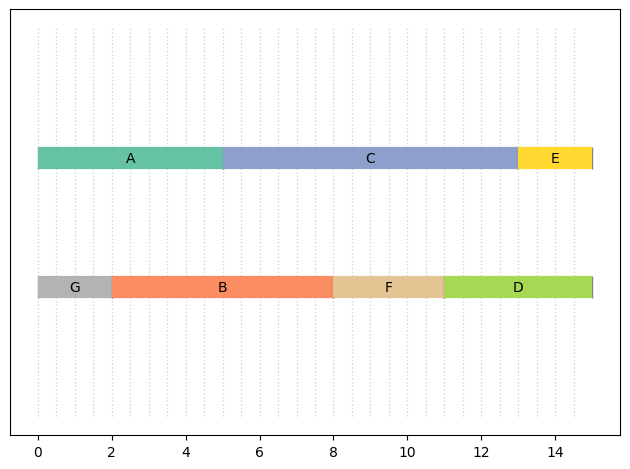

In [235]:
# https://stackoverflow.com/questions/65229519/scheduling-tasks-on-2-parallel-machines
# You could use CP techniques and a CP Solver. Here is an example using CP-Optimizer in Python:

# 1. PROBLEM DATA (EXAMPLE)
JOBS     = ['A','B','C','D','E','F','G',]
n        = 7
DURATION = [ 5, 6, 8, 4, 2, 3, 2 ]
# DAG      = [ [0,5], [1,6], [2,4], [3,7], [3,8], [4,10], [5,9], [6,11], [7,13], [8,12],[9,14], [10,15], [12,16], [14,17], [15,18], [16,19] ]
N        = range(n)

# 2. MODELING THE PROBLEM WITH CP-OPTIMIZER
from docplex.cp.model import *
m = CpoModel()
task = [interval_var(size=DURATION[i]) for i in N ]         # Decision     variables: tasks
usedMachines = sum([pulse(task[i],1) for i in N])           # Cumul function: number of tasks executing over time
m.add(minimize(max(end_of(task[i]) for i in N)))            # Objective: minimize schedule makespan
# m.add([end_before_start(task[i],task[j]) for [i,j] in DAG]) # Constraints: precedence between tasks
m.add(usedMachines <= 2)                                    # Constraints: maximal number of machines

# 3. SOLVING THE PROBLEM
sol = m.solve()

# 4. DISPLAY SOLUTION
# print(m.write_information(out=None))
# print(m.get_objective())

import docplex.cp.utils_visu as visu
for i in range(n):
    visu.interval(sol.get_var_solution(task[i]), i, JOBS[i])
visu.show()


## <b>Pyomo solution</b>

https://jckantor.github.io/ND-Pyomo-Cookbook/notebooks/04.02-Machine-Bottleneck.html

Chapter 4.2.5

Minimize scheduled makespan = 15

Presence of due dates.

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: -15.0
  Upper bound: -15.0
  Number of objectives: 1
  Number of constraints: 98
  Number of variables: 50
  Number of nonzeros: 15
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.74
  Wallclock time: 0.74
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 52
      Number of created 

{'Makespan': 15.0,
 'Max Pastdue': 0,
 'Sum of Pastdue': 0,
 'Number Pastdue': 0,
 'Number on Time': 7,
 'Fraction on Time': 1.0}

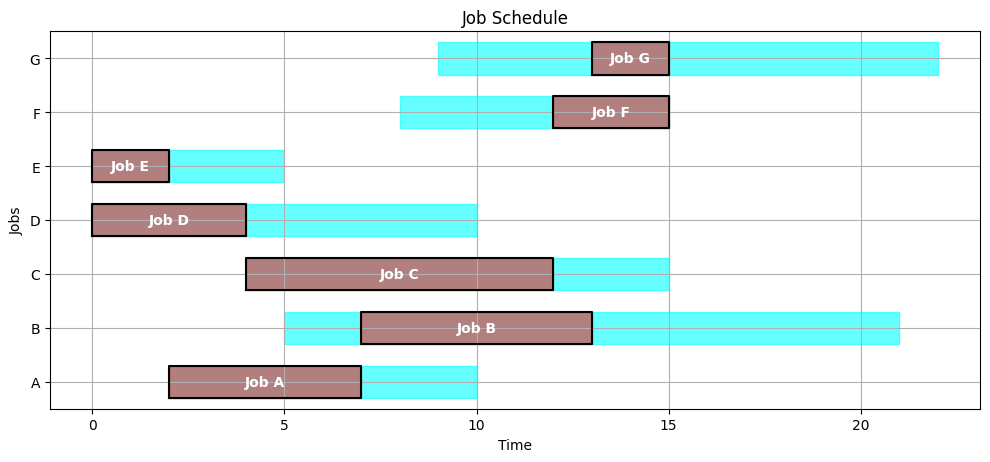

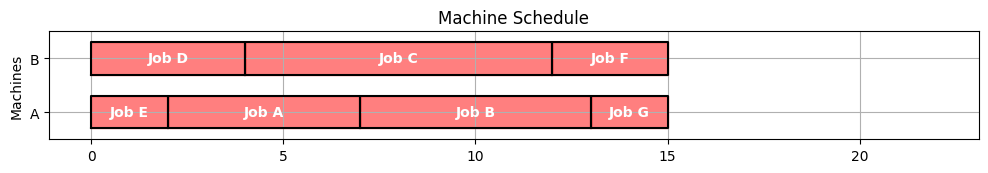

In [236]:
# -----------------------------------
# Import
# -----------------------------------
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd
import shutil
import sys
import os.path
from pyomo.environ import *
from pyomo.gdp import *


MACHINES = ['A','B']

# -----------------------------------
# Instance
# -----------------------------------
JOBS = {
    'A': {'release': 2, 'duration': 5, 'due': 10},
    'B': {'release': 5, 'duration': 6, 'due': 21},
    'C': {'release': 4, 'duration': 8, 'due': 15},
    'D': {'release': 0, 'duration': 4, 'due': 10},
    'E': {'release': 0, 'duration': 2, 'due':  5},
    'F': {'release': 8, 'duration': 3, 'due': 15},
    'G': {'release': 9, 'duration': 2, 'due': 22},
}

def schedule_machines(JOBS, MACHINES):
    
    # create model
    m = ConcreteModel()
    
    # index set to simplify notation
    m.J = Set(initialize=JOBS.keys())
    m.M = Set(initialize=MACHINES)
    m.PAIRS = Set(initialize = m.J * m.J, dimen=2, filter=lambda m, j, k : j < k)

    # decision variables
    m.start      = Var(m.J, bounds=(0, 1000))
    m.makespan   = Var(domain=NonNegativeReals)
    m.pastdue    = Var(m.J, domain=NonNegativeReals)
    m.early      = Var(m.J, domain=NonNegativeReals)
    
    # additional decision variables for use in the objecive
    m.ispastdue  = Var(m.J, domain=Binary)
    m.maxpastdue = Var(domain=NonNegativeReals)
    
    # for binary assignment of jobs to machines
    m.z = Var(m.J, m.M, domain=Binary)

    # for modeling disjunctive constraints
    m.y = Var(m.PAIRS, domain=Binary)
    BigM = max([JOBS[j]['release'] for j in m.J]) + sum([JOBS[j]['duration'] for j in m.J])

    m.OBJ = Objective(expr = sum(m.pastdue[j] for j in m.J) + m.makespan - sum(m.early[j] for j in m.J), sense = minimize)

    m.c1 = Constraint(m.J, rule=lambda m, j: 
            m.start[j] >= JOBS[j]['release'])
    m.c2 = Constraint(m.J, rule=lambda m, j:
            m.start[j] + JOBS[j]['duration'] + m.early[j] == JOBS[j]['due'] + m.pastdue[j])
    m.c3 = Constraint(m.J, rule=lambda m, j: 
            sum(m.z[j,mach] for mach in m.M) == 1)
    m.c4 = Constraint(m.J, rule=lambda m, j: 
            m.pastdue[j] <= BigM*m.ispastdue[j])
    m.c5 = Constraint(m.J, rule=lambda m, j: 
            m.pastdue[j] <= m.maxpastdue)
    m.c6 = Constraint(m.J, rule=lambda m, j: 
            m.start[j] + JOBS[j]['duration'] <= m.makespan)
    m.d1 = Constraint(m.M, m.PAIRS, rule = lambda m, mach, j, k:
            m.start[j] + JOBS[j]['duration'] <= m.start[k] + BigM*(m.y[j,k] + (1-m.z[j,mach]) + (1-m.z[k,mach])))
    m.d2 = Constraint(m.M, m.PAIRS, rule = lambda m, mach, j, k: 
            m.start[k] + JOBS[k]['duration'] <= m.start[j] + BigM*((1-m.y[j,k]) + (1-m.z[j,mach]) + (1-m.z[k,mach])))
    
    SolverFactory('cbc').solve(m).write()
    
    SCHEDULE = {}
    for j in m.J:
        SCHEDULE[j] = {
            'start': m.start[j](), 
            'finish': m.start[j]() + JOBS[j]['duration'],
            'machine': [mach for mach in MACHINES if m.z[j,mach]()][0]
        }
        
    return SCHEDULE
        
SCHEDULE = schedule_machines(JOBS,MACHINES)

# -----------------------------------
# Tracing gantt
# -----------------------------------
def gantt(JOBS, SCHEDULE={}):
    bw = 0.3
    plt.figure(figsize=(12, 0.7*(len(JOBS.keys()))))
    idx = 0
    for j in sorted(JOBS.keys()):
        x = JOBS[j]['release']
        y = JOBS[j]['due']
        plt.fill_between([x,y],[idx-bw,idx-bw],[idx+bw,idx+bw], color='cyan', alpha=0.6)
        if j in SCHEDULE.keys():
            x = SCHEDULE[j]['start']
            y = SCHEDULE[j]['finish']
            plt.fill_between([x,y],[idx-bw,idx-bw],[idx+bw,idx+bw], color='red', alpha=0.5)
            plt.plot([x,y,y,x,x], [idx-bw,idx-bw,idx+bw,idx+bw,idx-bw],color='k')
            plt.text((SCHEDULE[j]['start'] + SCHEDULE[j]['finish'])/2.0,idx,
                'Job ' + j, color='white', weight='bold',
                horizontalalignment='center', verticalalignment='center')
        idx += 1

    plt.ylim(-0.5, idx-0.5)
    plt.title('Job Schedule')
    plt.xlabel('Time')
    plt.ylabel('Jobs')
    plt.yticks(range(len(JOBS)), JOBS.keys())
    plt.grid()
    xlim = plt.xlim()
    
    if SCHEDULE:
        for j in SCHEDULE.keys():
            if 'machine' not in SCHEDULE[j].keys():
                SCHEDULE[j]['machine'] = 1
        MACHINES = sorted(set([SCHEDULE[j]['machine'] for j in SCHEDULE.keys()]))

        plt.figure(figsize=(12, 0.7*len(MACHINES)))
        for j in sorted(SCHEDULE.keys()):
            idx = MACHINES.index(SCHEDULE[j]['machine'])
            x = SCHEDULE[j]['start']
            y = SCHEDULE[j]['finish']
            plt.fill_between([x,y],[idx-bw,idx-bw],[idx+bw,idx+bw], color='red', alpha=0.5)
            plt.plot([x,y,y,x,x], [idx-bw,idx-bw,idx+bw,idx+bw,idx-bw],color='k')
            plt.text((SCHEDULE[j]['start'] + SCHEDULE[j]['finish'])/2.0,idx,
                'Job ' + j, color='white', weight='bold',
                horizontalalignment='center', verticalalignment='center')
        plt.xlim(xlim)
        plt.ylim(-0.5, len(MACHINES)-0.5)
        plt.title('Machine Schedule')
        plt.yticks(range(len(MACHINES)), MACHINES)
        plt.ylabel('Machines')
        plt.grid()

# -----------------------------------
# Display KPIs
# -----------------------------------
def kpi(JOBS, SCHEDULE):
    KPI = {}
    KPI['Makespan'] = max(SCHEDULE[job]['finish'] for job in SCHEDULE)
    KPI['Max Pastdue'] = max(max(0, SCHEDULE[job]['finish'] - JOBS[job]['due']) for job in SCHEDULE)
    KPI['Sum of Pastdue'] = sum(max(0, SCHEDULE[job]['finish'] - JOBS[job]['due']) for job in SCHEDULE)
    KPI['Number Pastdue'] = sum(SCHEDULE[job]['finish'] > JOBS[job]['due'] for job in SCHEDULE)
    KPI['Number on Time'] = sum(SCHEDULE[job]['finish'] <= JOBS[job]['due'] for job in SCHEDULE)
    KPI['Fraction on Time'] = KPI['Number on Time']/len(SCHEDULE)
    return KPI


gantt(JOBS, SCHEDULE)
kpi(JOBS, SCHEDULE)

# <b>33. Modeling of a 2d bin packing problem  </b>

<div style="text-align:center">
<img src="img/D-regular-packing-problem.png" width="500">
</div>


## <b>Abstract</b>
The goal is to fit as many rectangles, having different lengths and widths, into a bin.
There can be several bins.
The objective is to allocate all the items to the minimum number of bins.

https://github.com/solomon-b/greedypacker
## <b>Instance</b>
 <table style="margin: 0px auto;">
  <tr>
    <td>Rectangle</td>
    <td>A</td>
    <td>B</td>
    <td>C</td>
    <td>D</td>
    <td>E</td>
    <td>F</td>
  </tr>
  <tr>
    <td>Width</td>
    <td>100</td>
    <td>40</td>
    <td>30</td>
    <td>70</td>
    <td>100</td>
    <td>30</td>
</tr>
<tr>
    <td>Length</td>
    <td>30</td>
    <td>60</td>
    <td>30</td>
    <td>70</td>
    <td>50</td>
    <td>30</td>
</tr>
</table> 

<br>

 <table style="margin: 0px auto;">
  <tr>
    <td>Bins</td>
    <td>1</td>
    <td>2</td>
    <td>3</td>
  </tr>
  <tr>
    <td>Width</td>
    <td>300</td>
    <td>80</td>
    <td>200</td>

</tr>
<tr>
    <td>Length</td>
    <td>450</td>
    <td>40</td>
    <td>150</td>

</tr>
</table> 


## <b>Math model</b>

https://amsdottorato.unibo.it/id/eprint/6810/1/PhD_Pietrobuoni.pdf has a great 1d and 2d models description.

## <b>Rectpack code solution</b>

In this Rectpack solution, I see that only one bin is used, Rectpack provides the rectangles x and y positions inside of the bin .

In [237]:
# -----------------------------------
# Import
# -----------------------------------
from rectpack import newPacker

# -----------------------------------
# Instance
# -----------------------------------
rectangles = [(100, 30), (40, 60), (30, 30),(70, 70), (100, 50), (30, 30)]
bins = [(300, 450), (80, 40), (200, 150)]


# -----------------------------------
# Params
# -----------------------------------
packer = newPacker()

# Add the rectangles to packing queue
for r in rectangles:
	packer.add_rect(*r)

# Add the bins where the rectangles will be placed
for b in bins:
	packer.add_bin(*b)

# Start packing
packer.pack()

# -----------------------------------
# Solution
# -----------------------------------

# Obtain number of bins used for packing
nbins = len(packer)
print("Number of bins used for packing = ",nbins)

# Index first bin
abin = packer[0]

# Bin dimensions (bins can be reordered during packing)
width, height = abin.width, abin.height
print("Bin dimensions  = ",width, height)

# Number of rectangles packed into first bin
nrect = len(packer[0])
print("Number of rectangles packed into first bin = ",nrect)
print(" ---------------------------------------------------")

# Pick First bin first rectangle
rect = packer[0][0]

# rect is a Rectangle object
x = rect.x # rectangle bottom-left x coordinate
y = rect.y # rectangle bottom-left y coordinate
w = rect.width
h = rect.height

print(" first added rectangle bottom-left x coordinate = ", x)
print(" first added rectangle bottom-left y coordinate = ", y)
print(" first added rectangle width = ", w)
print(" first added rectangle height = ", h)
print(" ---------------------------------------------------")
# Pick First bin second rectangle
rect = packer[0][2]

# rect is a Rectangle object
x = rect.x # rectangle bottom-left x coordinate
y = rect.y # rectangle bottom-left y coordinate
w = rect.width
h = rect.height

print(" second added rectangle bottom-left x coordinate = ", x)
print(" second added rectangle bottom-left y coordinate = ", y)
print(" second added rectangle width = ", w)
print(" second added rectangle height = ", h)

# Looping over all of the rectangles positions
print(" ---------------------------------------------------")
print("Looping over all of the rectangles")
print("Printing rectangles width and height, and position inside of the bin")
print(" x,y,w,h")
for abin in packer:
  print(abin.bid) # Bin id if it has one
  for rect in abin:
    print(rect)

Number of bins used for packing =  1
Bin dimensions  =  300 450
Number of rectangles packed into first bin =  6
 ---------------------------------------------------
 first added rectangle bottom-left x coordinate =  0
 first added rectangle bottom-left y coordinate =  0
 first added rectangle width =  100
 first added rectangle height =  50
 ---------------------------------------------------
 second added rectangle bottom-left x coordinate =  0
 second added rectangle bottom-left y coordinate =  50
 second added rectangle width =  100
 second added rectangle height =  30
 ---------------------------------------------------
Looping over all of the rectangles
Printing rectangles width and height, and position inside of the bin
 x,y,w,h
None
R(0, 0, 100, 50)
R(100, 0, 70, 70)
R(0, 50, 100, 30)
R(170, 0, 60, 40)
R(230, 0, 30, 30)
R(260, 0, 30, 30)


## Drawing the content of the bin

As Rectpack provided the rectangles positions, we can draw them inside of the bin, using matplotlib for a better understanding of the optimization caracteristics.

Thanks to https://www.gorillasun.de/blog/rectangle-packing-an-incredibly-difficult-problem/

bin 300 450 nr of rectangles in bin 6
rectangle 100 50
rectangle 70 70
rectangle 100 30
rectangle 60 40
rectangle 30 30
rectangle 30 30


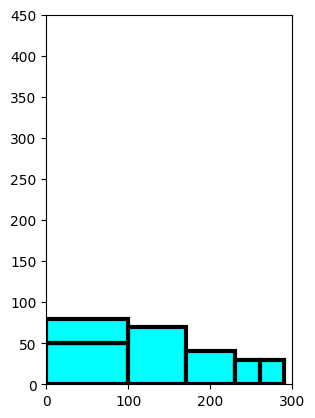

In [238]:
import matplotlib.pyplot as plt
from matplotlib import patches

output = []
for index, abin in enumerate(packer):
    bw, bh  = abin.width, abin.height
    print('bin', bw, bh, "nr of rectangles in bin", len(abin))
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
for rect in abin:
    x, y, w, h = rect.x, rect.y, rect.width, rect.height
    output.append([x,y,w,h])
    plt.axis([0,bw,0,bh])
    print('rectangle', w,h)
    ax.add_patch(
        patches.Rectangle(
            (x, y),  # (x,y)
            w,          # width
            h,          # height
            facecolor="#00ffff",
            edgecolor="black",
            linewidth=3
        )
    )
    fig.savefig("rect_%(index)s.png" % locals(), dpi=144, bbox_inches='tight')
# printing the rectangle coordinates to plot them in P5JS

## Google OR solution

Let's now compare the Rectpack solution, to the Google OR tools solution .

! Please wait, doing it !

In [239]:
%%time
from ortools.sat.python import cp_model
import pandas

#---------------------------------------------------
# data 
#---------------------------------------------------

data = {'bin':{'h':60,'w':40},
        'cat1':{'w': 7,'h':12,'items':10},
        'cat2':{'w': 9,'h': 3,'items':10},
        'cat3':{'w': 5,'h':14,'items':10},
        'cat4':{'w':13,'h': 9,'items':10},
        'cat5':{'w': 6,'h': 8,'items': 5},
        'cat6':{'w':20,'h': 5,'items': 5}}      

#
# extract data for easier access
#

# bin width and height
H = data['bin']['h']
W = data['bin']['w']

# h,w,cat for each item
h = [data[cat]['h'] for cat in data if cat!='bin' for i in range(data[cat]['items'])]
w = [data[cat]['w'] for cat in data if cat!='bin' for i in range(data[cat]['items'])]
cat = [cat for cat in data if cat!='bin' for i in range(data[cat]['items'])]
n = len(h)  # number of items
m = 10  # max number of bins

#---------------------------------------------------
# or-tools model 
#---------------------------------------------------

model = cp_model.CpModel()

#
# variables
#

# x and y
x = [model.NewIntVar(0,W-w[i],f'x{i}') for i in range(n)]

xb1 = [model.NewIntVar(0,m*W-w[i],f'xb1.{i}') for i in range(n)]
xb2 = [model.NewIntVar(w[i],m*W,f'xb2.{i}') for i in range(n)]

y1 = [model.NewIntVar(0,H-h[i],f'y1.{i}') for i in range(n)]
y2 = [model.NewIntVar(h[i],H,f'y2.{i}') for i in range(n)]

# interval variables
xival = [model.NewIntervalVar(xb1[i],w[i],xb2[i],f'xival{i}') for i in range(n)]
yival = [model.NewIntervalVar(y1[i],h[i],y2[i],f'yival{i}') for i in range(n)]

# bin numbers
b = [model.NewIntVar(0,m-1,f'b{i}') for i in range(n)]

# objective
z = model.NewIntVar(0,m-1,'z')

#
# constraints
#
for i in range(n):
  model.Add(xb1[i] == x[i] + b[i]*W)
  model.Add(xb2[i] == xb1[i] + w[i])

model.AddNoOverlap2D(xival,yival)

model.AddMaxEquality(z,[b[i] for i in range(n)])

# objective
model.Minimize(z)    

#
# solve model
#
solver = cp_model.CpSolver()
# log does not work inside a Jupyter notebook
# solver.parameters.log_search_progress = True
rc = solver.Solve(model)
print(f"return code:{rc}")
print(f"status:{solver.StatusName()}")

print(solver.Value(b[i]) for i in range(n))
print(solver.Value(x[i]) for i in range(n))

# if rc == 4:
#     df = pandas.DataFrame({ 
#         'bin' : [solver.Value(b[i]) for i in range(n)],
#         'x'   : [solver.Value(x[i]) for i in range(n)],
#         'y'   : [solver.Value(y1[i]) for i in range(n)],
#         'w'   : w,
#         'h'   : h})
#     display(df)

return code:4
status:OPTIMAL
<generator object <genexpr> at 0x0000018D0A74B0B0>
<generator object <genexpr> at 0x0000018D0A74B0B0>
CPU times: total: 531 ms
Wall time: 121 ms


34. <b> Modeling of a 3d bin packing problem  </b>

<div style="text-align:center">
<img src="img/FactoryFloor_HL_Plastics_Plant.jpg" width="500">
</div>

## <b>Abstract</b>
Comin' soon

## <b>Instance</b>
Comin' soon

## <b>Math model</b>
Comin' soon

## <b>Cplex code solution</b>
Comin' soon

34. <b> Modeling of a 2d cutting stock problem  </b>

## <b>Abstract</b>
Comin' soon

## <b>Instance</b>
Comin' soon

## <b>Math model</b>
Comin' soon

## <b>Cplex code solution</b>
Comin' soon

# <b>36.Modeling of a job shop problem  </b> 

## <b>Abstract</b>
Comin' soon

## <b> Difference between Flow shop and Job shop</b>
Comin' soon

## <b>Instance</b>
Comin' soon

## <b>Math model</b>
Comin' soon

## <b>Cplex code solution</b>
Comin' soon


CPlex Min Kyung Lee code:
https://medium.com/@minkyunglee_5476/mixed-integer-linear-programming-for-flow-shop-and-job-shop-part-1-1b2a277ab5ae

In [240]:
from docplex.mp.model import Model
import time

# Create model
model = Model(name="flowshop_ordering")

# Sets
jobs = ['i1', 'i2', 'i3', 'i4', 'i5', 'i6']
machines = ['bending', 'soldering', 'assembly']

# Processing times
proctime = {
    ('bending', 'i1'): 3, ('bending', 'i2'): 6, ('bending', 'i3'): 3,
    ('bending', 'i4'): 5, ('bending', 'i5'): 5, ('bending', 'i6'): 7,
    ('soldering', 'i1'): 5, ('soldering', 'i2'): 4, ('soldering', 'i3'): 2,
    ('soldering', 'i4'): 4, ('soldering', 'i5'): 4, ('soldering', 'i6'): 5,
    ('assembly', 'i1'): 5, ('assembly', 'i2'): 2, ('assembly', 'i3'): 4,
    ('assembly', 'i4'): 6, ('assembly', 'i5'): 3, ('assembly', 'i6'): 6,
}

bigM = 1000 #this is set to a large number for illustration purposes. Must choose a reasonable value

# Variables
y = {(j,k ): model.binary_var(name=f"y_{j}_{k}") for j in jobs for k in jobs} #j processed before k
t = {(i,m) : model.continuous_var(lb = 0, name = f"t_{i}_{m}") for i in jobs for m in machines} #start time of job j in machine m
makespan = model.continuous_var(lb=0, name="makespan")

# Objective
model.minimize(makespan)

# Constraint 1: job order
for j in jobs:
    for k in jobs:
        if j != k:
            for m in machines:
                model.add_constraint(t[j, m] + proctime[m, j] <= t[k, m] + bigM*(1 - y[j,k]))
                model.add_constraint(t[k, m] + proctime[m, k] <= t[j, m] + bigM*y[j,k])

# Constraint 2: machine order
for i in jobs:
    for m in range(len(machines) - 1):
        model.add_constraint(t[i, machines[m]] + proctime[machines[m], i] <= t[i, machines[m+1]])

# Constraint 3: makespan
for j in jobs:
    for m in machines:
        model.add_constraint(makespan >= t[j, m] + proctime[m, j])

# Solve
time_now = time.time()
solution = model.solve(log_output=True)
time_taken = time.time() - time_now

if solution:
    print("\nStart times:")
    for i in jobs:
        for m in machines:
            print(f"Start time of {i} on {m}: {t[i,m].solution_value:.2f} for {proctime[(m, i)]} hours")
    print("\nMakespan:", makespan.solution_value)

print(f"computational time is {time_taken} ")

Version identifier: 22.1.1.0 | 2023-02-09 | 22d6266e5
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
MIP Presolve eliminated 0 rows and 6 columns.
Reduced MIP has 210 rows, 49 columns, and 600 nonzeros.
Reduced MIP has 30 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.24 ticks)
Probing time = 0.00 sec. (0.09 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 210 rows, 49 columns, and 600 nonzeros.
Reduced MIP has 30 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.29 ticks)
Probing time = 0.00 sec. (0.10 ticks)
Clique table members: 30.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.00 sec. (0.20 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

      0     0  

# <b> 37. Getting familiar with sensitivity analysis</b>

Best link :
https://www.eit.lth.se/fileadmin/eit/courses/eitn95/2018/Labs_assignments/Sensitivity_Analysis_in_Excel.pdf

Sensitivity analysis allows you to know to what extent you can change the parameters of the solution provided. This allows decision-makers to assess if it is worth increasing the inventory, for example.

- Reduced costs:

Reduced costs tell us how much the coefficients of the objective function (unit profits) can be increased or decreased before the optimal solution changes. Example: "If we increase the unit profit of children's seats with 20 or more units, the optimal value will change"

- The Shadow Price:

The Shadow Price tells us how much the optimal solution can be increased or decreased if we modify the available resources in a single unit.
 Or 
The Shadow price measures the variation in the value of the objective function per unit of increase in the limit of constraint.

- Slacks:

The quantity of a resource that is not used. Let us know how many resources are "wasted" or "unused". When you have inventory constraints, these values ​​allow you to know the amount of unused inventory.

## <b>Displaying sensitivity analysis with Python Pulp</b>

<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

Let's display the slacks and shadow price in this agricultural example done by me :

Looking at the results, we see that an amount of 16 food units is wasted , while doing the optimization.

There is no shadow price .

In [241]:
# Good link : https://s3.amazonaws.com/assets.datacamp.com/production/course_8835/slides/chapter4.pdf

# -----------------------------------
# Import lib
# -----------------------------------
import pulp as p 
import pandas as pd

# -----------------------------------
# Type of problem
# -----------------------------------
problem = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# -----------------------------------
# Decisions variables
# -----------------------------------
pet1 = p.LpVariable("pet1", 0, None, p.LpInteger)   
pet2 = p.LpVariable("pet2", 0, None, p.LpInteger)   
pet3 = p.LpVariable("pet3", 0, None, p.LpInteger)  

# -----------------------------------
# Objective function
# -----------------------------------
problem +=  100 * pet1 + 110 * pet2 + 115 * pet3

# -----------------------------------
# Constraints
# -----------------------------------
# --  Les shadow price sont ici :
problem += (7 * pet1 + 7 * pet2 + 8 * pet3 <= 600,"water_constraint")
problem += (4.5* pet1 + 9 * pet2 + 3 * pet3 <= 700,"food_constraint")

# -----------------------------------
# Solve
# -----------------------------------
problem.solve()
# Display optimized vars
for v in problem.variables():
    print(v.name, "=", v.varValue)
# Display optimized objective function
print("Total maximized profit = ", p.value(problem.objective))
print(f"status: {problem.status}, {p.LpStatus[problem.status]}")

# -----------------------------------
# Sensitivity analysis
# -----------------------------------
sensitivity_data = []
for name, constraint in problem.constraints.items():
    sensitivity_data.append({'Name': name,
                             'Constraint': constraint,
                             'Shadow Price': constraint.pi,
                             'Slack': constraint.slack
                             })
Modeloutput = pd.DataFrame(sensitivity_data)
print((Modeloutput))


pet1 = 0.0
pet2 = 72.0
pet3 = 12.0
Total maximized profit =  9300.0
status: 1, Optimal
               Name                     Constraint  Shadow Price  Slack
0  water_constraint    {pet1: 7, pet2: 7, pet3: 8}          -0.0   -0.0
1   food_constraint  {pet1: 4.5, pet2: 9, pet3: 3}          -0.0   16.0


## <b> A second short example showing the Shadow Price in action. </b>

The Shadow Price tells us that if we increase the C1 constraint  which is our inventory, we will win 78.14 euros more , we also see that we waste 1.33 units of constraint 3 inventory. 



Author: Aaren Stubberfield

In [242]:
# -----------------------------------
# Import lib
# -----------------------------------
import pulp as p

# -----------------------------------
# Type of problem
# -----------------------------------
model = p.LpProblem("Max_GlassCo_Profits",p.LpMaximize)
A = p.LpVariable('A', lowBound=0)
B = p.LpVariable('B', lowBound=0)
C = p.LpVariable('C', lowBound=0)

# -----------------------------------
# Objective
# -----------------------------------
model += 500 * A + 450 * B + 600 * C

# -----------------------------------
# Constraints
# -----------------------------------
# Constraint 1
model += 6 * A + 5 * B + 8 * C <= 60
# Constraint 2
model += 10.5 * A + 20 * B + 10 * C <= 150
# Constraint 3
model += A <= 8

# -----------------------------------
# Solve
# -----------------------------------
model.solve()
print("Model Status:{}".format(p.LpStatus[model.status]))
print("Objective = ", p.value(model.objective))
for v in model.variables():
    print(v.name, "=", v.varValue)
    
# -----------------------------------
# Sensitivity analysis
# -----------------------------------
sensitivity_data = []
for name, constraint in model.constraints.items():
    sensitivity_data.append({'Name': name,
                             'Constraint': constraint,
                             'Shadow Price': constraint.pi,
                             'Slack': constraint.slack
                             })
Modeloutput = pd.DataFrame(sensitivity_data)
print((Modeloutput))

Model Status:Optimal
Objective =  5133.333350000001
A = 6.6666667
B = 4.0
C = 0.0
  Name               Constraint  Shadow Price     Slack
0  _C1       {A: 6, B: 5, C: 8}     78.148148 -0.000000
1  _C2  {A: 10.5, B: 20, C: 10}      2.962963 -0.000000
2  _C3                   {A: 1}     -0.000000  1.333333


to do later : 
## Instance


A Cutting Stock Problem=

==The Sponge Roll Production Problem==

## ===*Problem Description*===

The Better Food Company produces cream-filled sponge rolls with a standard width of 20 cm each. Each 20cm roll costs the company $1.00 to produce. Special customer orders with different widths are produced by cutting (slitting) the standard rolls of sponge into shorter lengths. The fixed daily orders are summarized in the following table. These orders need to be met at least cost.

||Order Desired || Width (cm) Desired || Number of Rolls ||
||A ||5 ||150 ||
||B ||7 ||200 ||
||C ||9 ||300 ||

An order is filled by setting the cutting knives to the desired widths. Usually, there are a number of ways in which standard rolls can be slit to fill a given order. The figure below shows three possible knife settings for the 20-cm roll. Although there are other feasible settings, we limit the discussion for the moment to considering settings 1, 2 and 3 in the figure. Note that the shaded area in each diagram represents lengths of sponge that are too short to be used in meeting orders, and so these pieces must be thrown away. Such wastage is called trim loss.

http://pulp-or.googlecode.com/svn/wiki/cutting_rolls.jpg

The Better Food Company wants to know how to cut the 20cm rolls to minimise the cost of meeting their customer orders.

## ===Formulation===
The Sponge Roll Production Problem is an example of a Cutting Stock model. Cutting Stock models are a specialisation of Set Covering models. The generalised set covering model is:

http://pulp-or.googlecode.com/svn/wiki/1770704298-14px.png

For cutting stock models, each column of the model represents a possible cutting pattern and each constraint represents a requirement for the patterns (in The Sponge Roll Production Problem the requirements are the customer orders). Much of the complexity in cutting stock models (and indeed set covering models in general) is removed during the generation of the columns. Each column represents a feasible pattern, but the complexity of producing feasible patterns is removed from the mathematical programme.

When formulating we will consider two alternatives:

- The usual formulation (by row);
- The [ColumnGeneration2 formulation].

 === _1. Identify the Decision Variables_===

The decision variables are the number of times to use each sensible cutting pattern.

=== _2. Formulate the Objective Function_===

Each cutting pattern has an associated cost, in this case the cost of the 20cm roll used (i.e., $1.00). The objective function is the cost of the total number of 20cm rolls required to be cut.
 
## === _3. Formulate the Constraints_===
The constraints ensure that the desired number of smaller rolls are produced by cutting the 20cm rolls.
==*Solution*==

The introductory commenting and import statement is entered.
## Math model
## Python Pulp solution (Hard coded)